In [2]:
import sys
print(sys.executable)
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

%matplotlib inline

/usr/bin/python3


In [3]:
data = pd.read_excel("Train_data.xlsx")
data.shape

(1039, 41)

In [4]:
data

Warehouse id Region   SKU id  2018-04-01 00:00:00  2018-05-01 00:00:00  \
0            Wh-1  NORTH    SKU-1                   27                   13   
1            Wh-1  NORTH    SKU-2                   88                   28   
2            Wh-1  NORTH    SKU-3                    6                    6   
3            Wh-1  NORTH    SKU-4                  162                  184   
4            Wh-1  NORTH    SKU-5                  171                  402   
...           ...    ...      ...                  ...                  ...   
1034         Wh-4  SOUTH  SKU-229                    7                    7   
1035         Wh-4  SOUTH  SKU-230                   49                   25   
1036         Wh-4  SOUTH  SKU-231                   21                   13   
1037         Wh-4  SOUTH  SKU-232                   15                   13   
1038         Wh-4  SOUTH  SKU-233                  252                  105   

      2018-06-01 00:00:00  2018-07-01 00:00:00  2018-08-01 00:00:00  \
0                      30                   14                   22   
1                     127                  130                   58   
2                       6                    6                    6   
3                     110                  172                   90   
4                     627                  615                  300   
...                   ...                  ...                  ...   
1034                    7                    7                    7   
1035                   41                   13                   21   
1036                   13                   21                   29   
1037                   13                   11                    9   
1038                   33                   39                   15   

      2018-09-01 00:00:00  2018-10-01 00:00:00  ...  2020-08-01 00:00:00  \
0                       8                    8  ...                   12   
1                      10                    7  ...                   16   
2                       6                    6  ...                    8   
3                      40                   18  ...                   82   
4                     417                  141  ...                  468   
...                   ...                  ...  ...                  ...   
1034                    7                    7  ...                  591   
1035                   53                   33  ...                    9   
1036                   21                   21  ...                   13   
1037                   11                   36  ...                    9   
1038                   33                   93  ...                   15   

      2020-09-01 00:00:00  2020-10-01 00:00:00  2020-11-01 00:00:00  \
0                       8                    8                    8   
1                       7                    7                    7   
2                       6                    6                    6   
3                      78                   38                   18   
4                     216                   75                    6   
...                   ...                  ...                  ...   
1034                  167                  455                  215   
1035                    9                   21                  133   
1036                   13                   13                   13   
1037                    9                   17                   13   
1038                   15                   15                   15   

      2020-12-01 00:00:00  2021-01-01 00:00:00  2021-02-01 00:00:00  \
0                       8                    8                   14   
1                       7                    7                   13   
2                       6                    6                    6   
3                      22                   28                   36   
4                      30                   66                  141   
...        

In [5]:
data.describe()

2018-04-01   2018-05-01   2018-06-01   2018-07-01   2018-08-01  \
count   1039.000000  1039.000000  1039.000000  1039.000000  1039.000000   
mean     248.102984   216.824832   209.153994   157.714148   174.883542   
std      785.750982   493.283000   480.078224   351.488015   450.706178   
min        1.000000     1.000000     1.000000     1.000000     1.000000   
25%        9.000000     9.500000    10.000000    10.000000     9.000000   
50%       18.000000    19.000000    19.000000    18.000000    19.000000   
75%      191.000000   186.500000   192.500000   137.000000   128.000000   
max    17540.000000  5029.000000  5823.000000  3151.000000  6700.000000   

        2018-09-01   2018-10-01    2018-11-01    2018-12-01    2019-01-01  \
count  1039.000000  1039.000000   1039.000000   1039.000000   1039.000000   
mean    158.524543   161.719923    201.784408    212.032724    177.205967   
std     374.631088   376.697992    614.940984    766.657455    790.932939   
min       1.000000     1.000000      1.000000      1.000000      1.000000   
25%      10.000000     9.000000     10.000000     10.000000     10.000000   
50%      19.000000    19.000000     19.000000     19.000000     20.000000   
75%     140.000000   127.500000    143.500000    170.000000    130.500000   
max    4604.000000  3576.000000  10322.000000  18336.000000  19324.000000   

       ...   2020-08-01   2020-09-01   2020-10-01    2020-11-01    2020-12-01  \
count  ...  1039.000000  1039.000000  1039.000000   1039.000000   1039.000000   
mean   ...   213.336862   207.782483   238.777671    258.241578    388.457170   
std    ...   498.147866   495.033144   552.393333    950.188944   1374.171617   
min    ...     1.000000     1.000000     1.000000      1.000000      1.000000   
25%    ...    17.000000    16.000000    19.000000     18.500000     30.500000   
50%    ...    63.000000    60.000000    73.000000     67.000000    106.000000   
75%    ...   186.000000   181.500000   215.000000    198.000000    297.500000   
max    ...  6283.000000  6097.000000  7469.000000  18148.000000  30996.000000   

         2021-01-01    2021-02-01    2021-03-01   2021-04-01   2021-05-01  
count   1039.000000   1039.000000   1039.000000  1039.000000  1039.000000  
mean     274.597690    275.120308    387.707411   150.856593   122.123195  
std      805.756394    699.096181   1106.507945   420.741507   329.277995  
min        1.000000      1.000000      1.000000     1.000000     1.000000  
25%       22.500000     32.000000     43.000000    18.000000    14.000000  
50%       77.000000    105.000000    129.000000    46.000000    33.000000  
75%      218.500000    254.000000    339.500000   133.000000    92.000000  
max    12020.000000  11641.000000  16483.000000  9199.000000  4669.000000  

[8 rows x 38 columns]

In [6]:
def plot_d(data):
    plt.style.use('seaborn-whitegrid')
    plt.figure(figsize=(16,16))
    for i in range(0,data.shape[0]):
        plt.plot(data.iloc[i,:])
    plt.show()


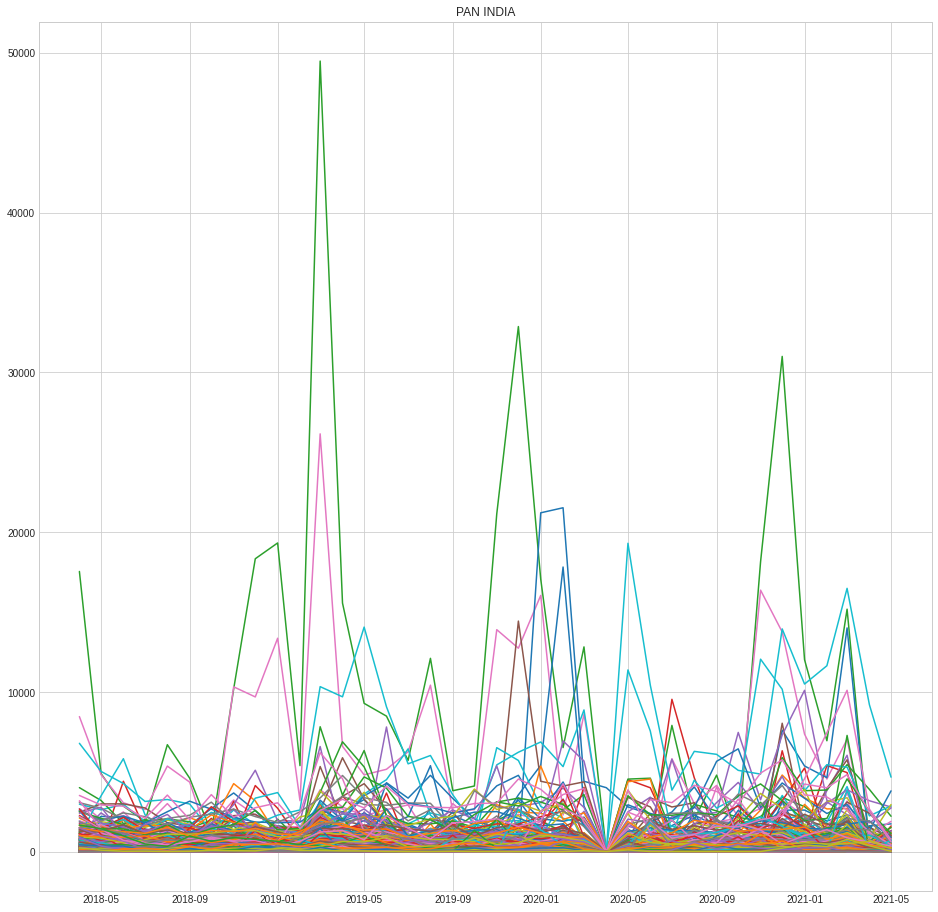

In [7]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16,16))
plt.title("PAN INDIA")
for i in range(0,data.shape[0]):
    plt.plot(data.iloc[i,3:])
plt.show()


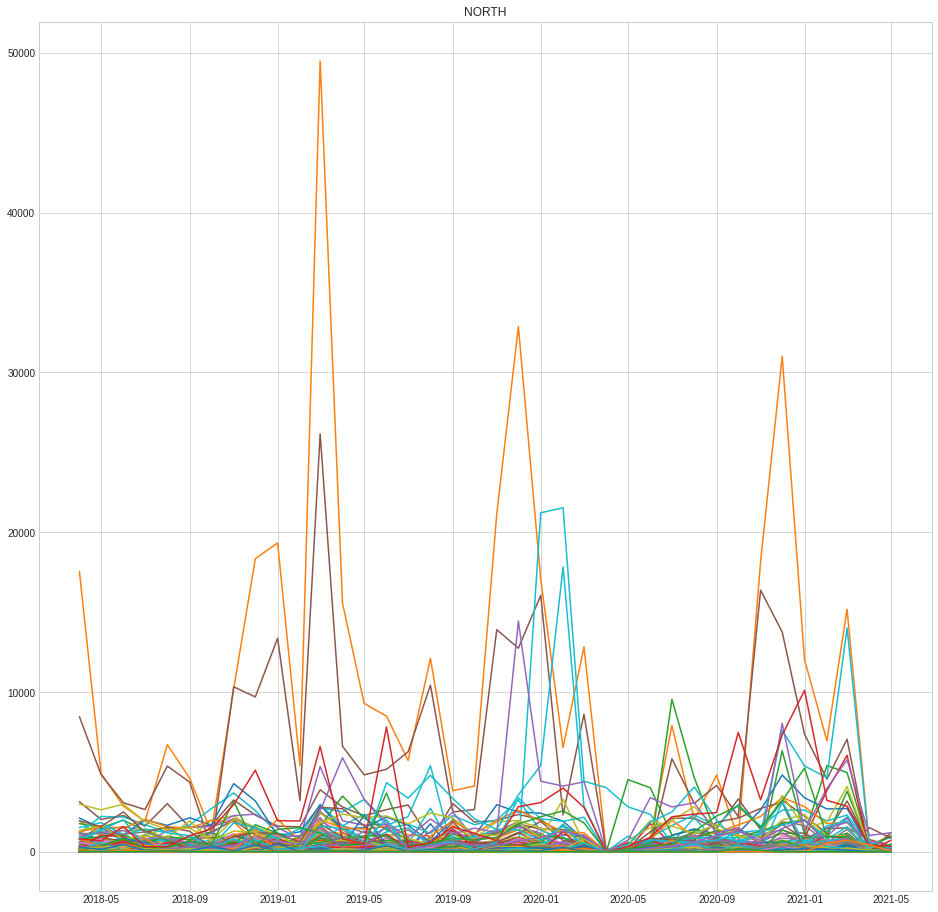

In [8]:
plt.figure(figsize=(16,16))
plt.title("NORTH")
for i in range(1,234):
    plt.plot(data.iloc[i,3:])
plt.show()  


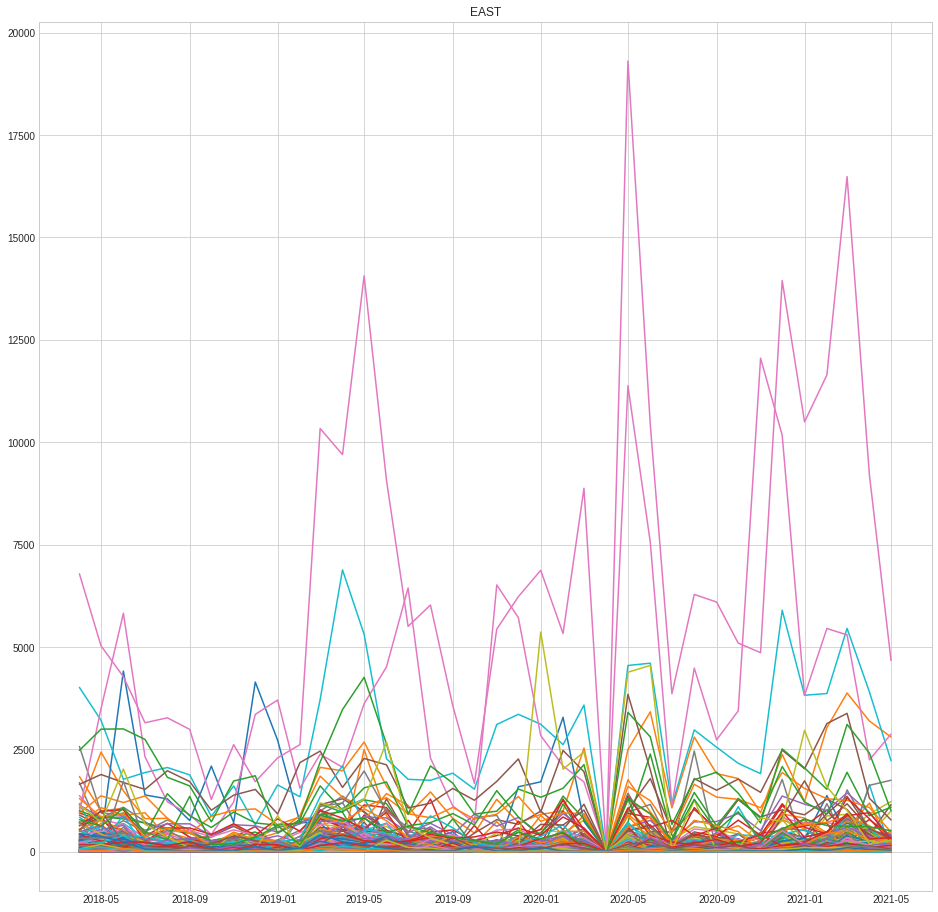

In [9]:

plt.figure(figsize=(16,16))
plt.title("EAST")
for i in range(233,445):
    plt.plot(data.iloc[i,3:])
plt.show()

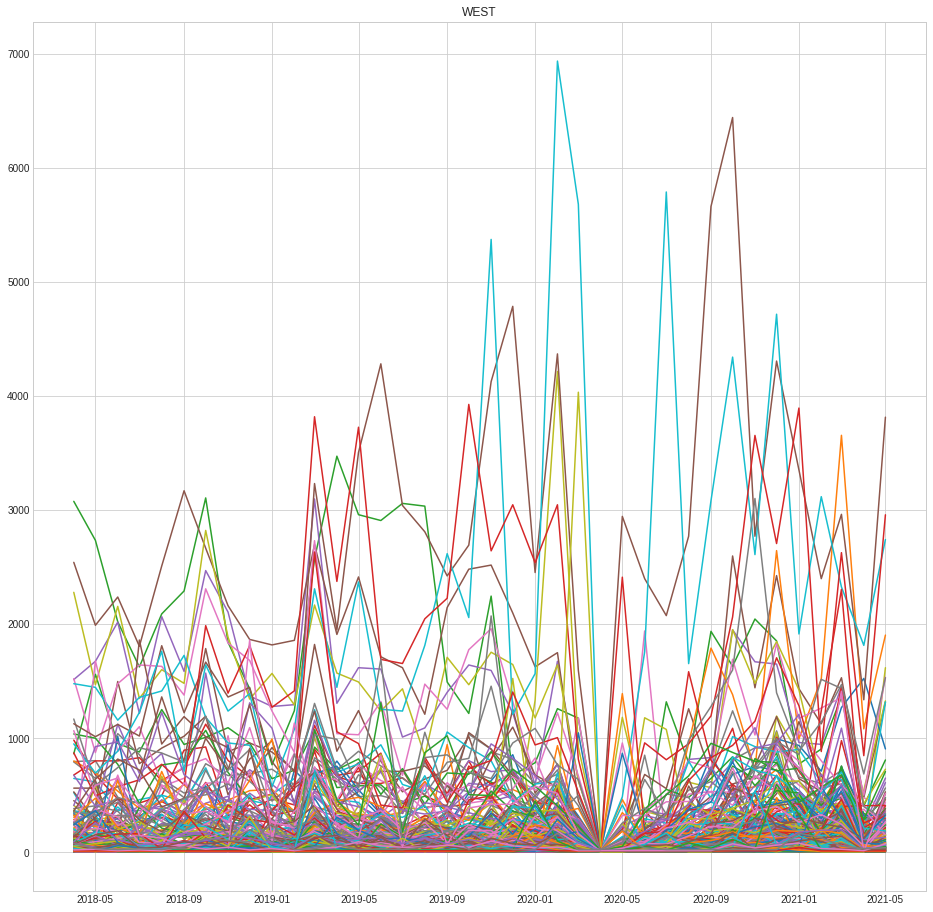

In [10]:
plt.figure(figsize=(16,16))
plt.title("WEST")
for i in range(445,753):
        plt.plot(data.iloc[i,3:])
plt.show()


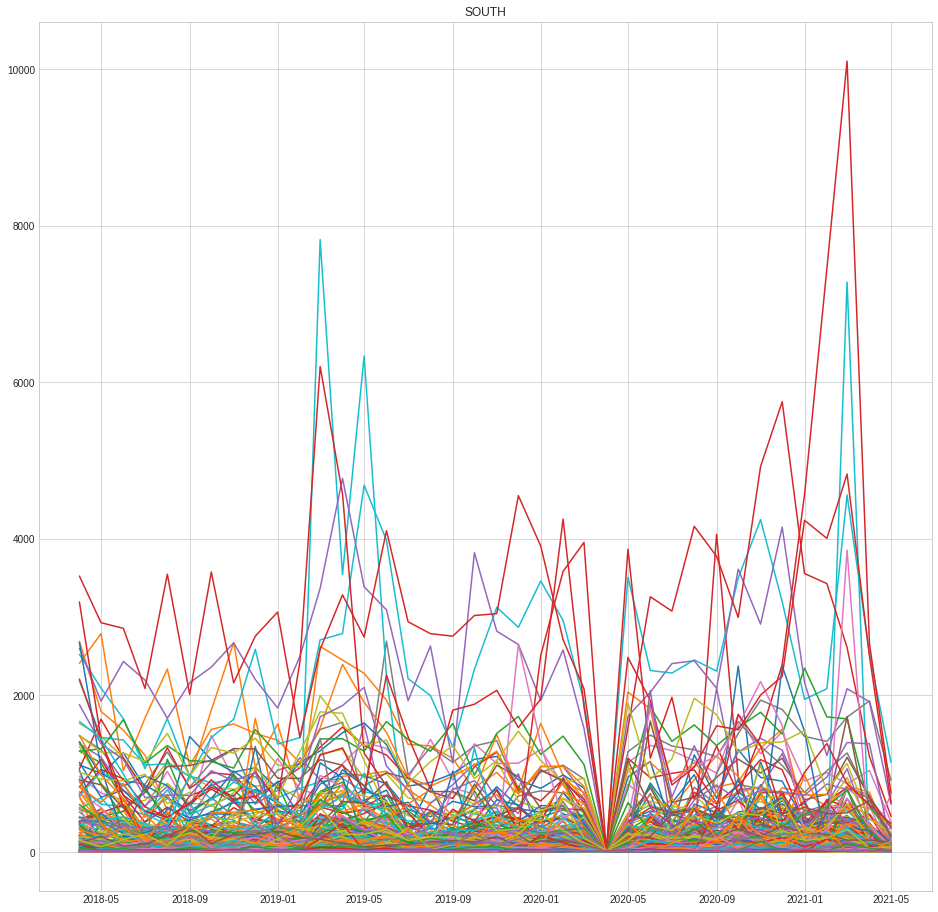

In [11]:

plt.figure(figsize=(16,16))
plt.title("SOUTH")
for i in range(753,1038):
        plt.plot(data.iloc[i,3:])
plt.show()


In [12]:
items_all = set(data.iloc[:,2])
len(items_all)

408

In [13]:
items_north = set(data.iloc[0:233,2])
len(items_north)

233

In [14]:
items_east = set(data.iloc[233:445,2])
len(items_east)

212

In [15]:
items_west = set(data.iloc[445:753,2])
len(items_west)

308

In [16]:
items_south = set(data.iloc[753:1038,2])
len(items_south)

285

In [17]:
NEWS = list(items_all)
NEW = set.intersection(items_north,items_east,items_west)

In [18]:
NEWS.sort(key = lambda sku : int(sku[4:]))

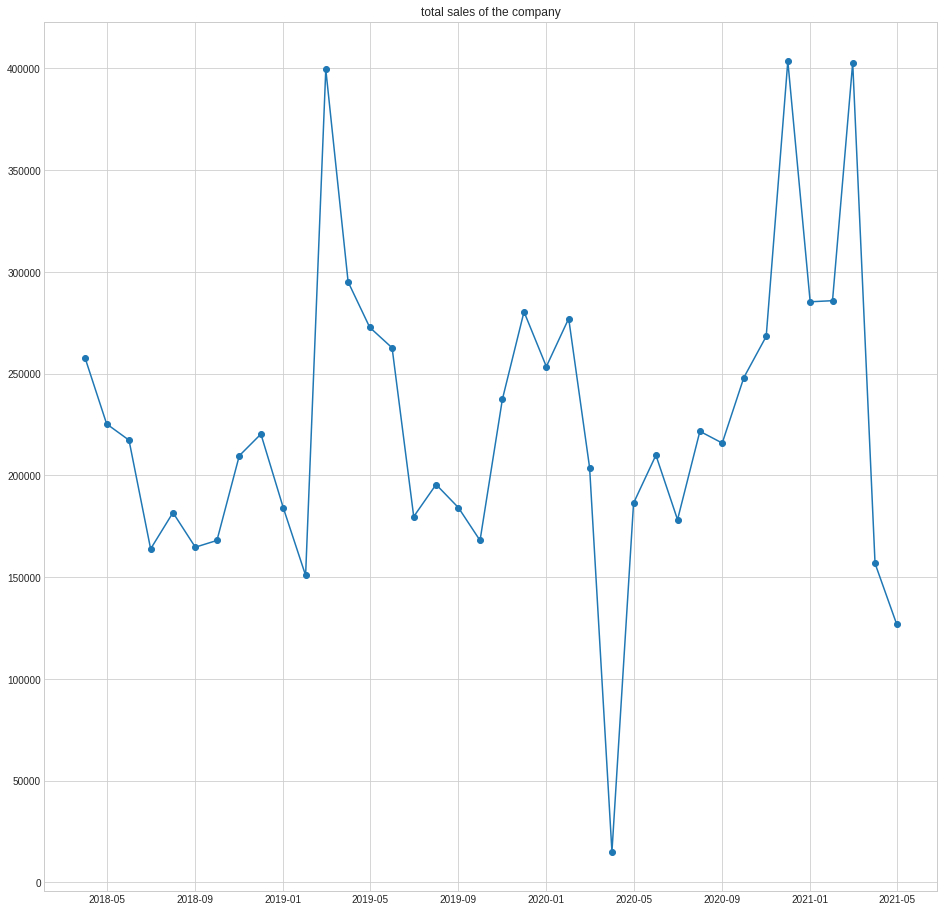

In [19]:
plt.figure(figsize=(16,16))
plt.title('total sales of the company')
plt.plot(data.iloc[:,3:].sum(),marker='o')
plt.show()

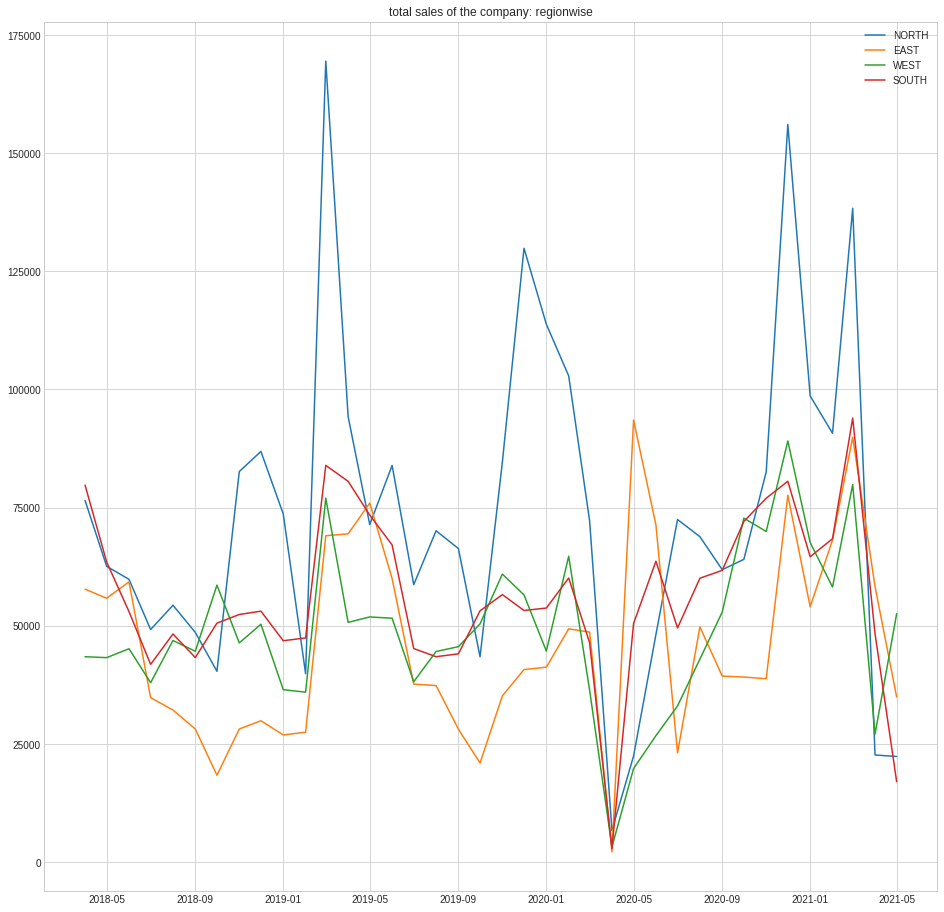

In [20]:
plt.figure(figsize=(16,16))
plt.title('total sales of the company: regionwise')
plt.plot(data.iloc[0:233,3:].sum())
plt.plot(data.iloc[233:445,3:].sum())
plt.plot(data.iloc[445:753,3:].sum())
plt.plot(data.iloc[753:1038,3:].sum())
plt.legend(['NORTH','EAST','WEST','SOUTH'])
plt.show()

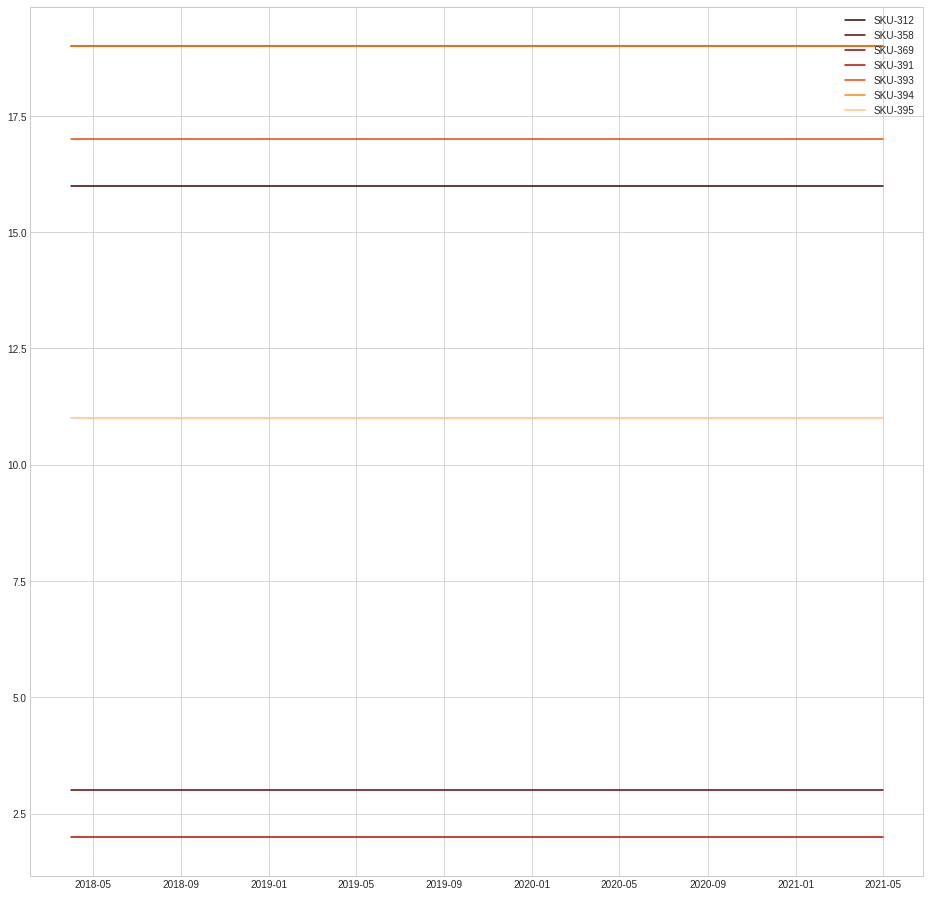

7


In [33]:
item_data = pd.DataFrame(columns=data.columns[3:])
# kfae = sns.color_palette('gist_heat',)
plt.figure(figsize=(16,16))
l = []
count = 0

for i in NEWS:
    item_records = data.loc[data['SKU id'] == i]
    item_total = item_records.iloc[:,3:].sum()
    item_data.loc[i] = item_total
    if item_total[:38].mean()==item_total[15]:
        l.append(i)
        plt.plot(item_total,color = kfae[count])

        count+=1

plt.legend(l,loc='upper right')
plt.show()

print(count)

In [22]:
yearwise_months = list()
for i in range(3,39,12):
    yearwise_months.append(list(data.columns[i:i+12]))

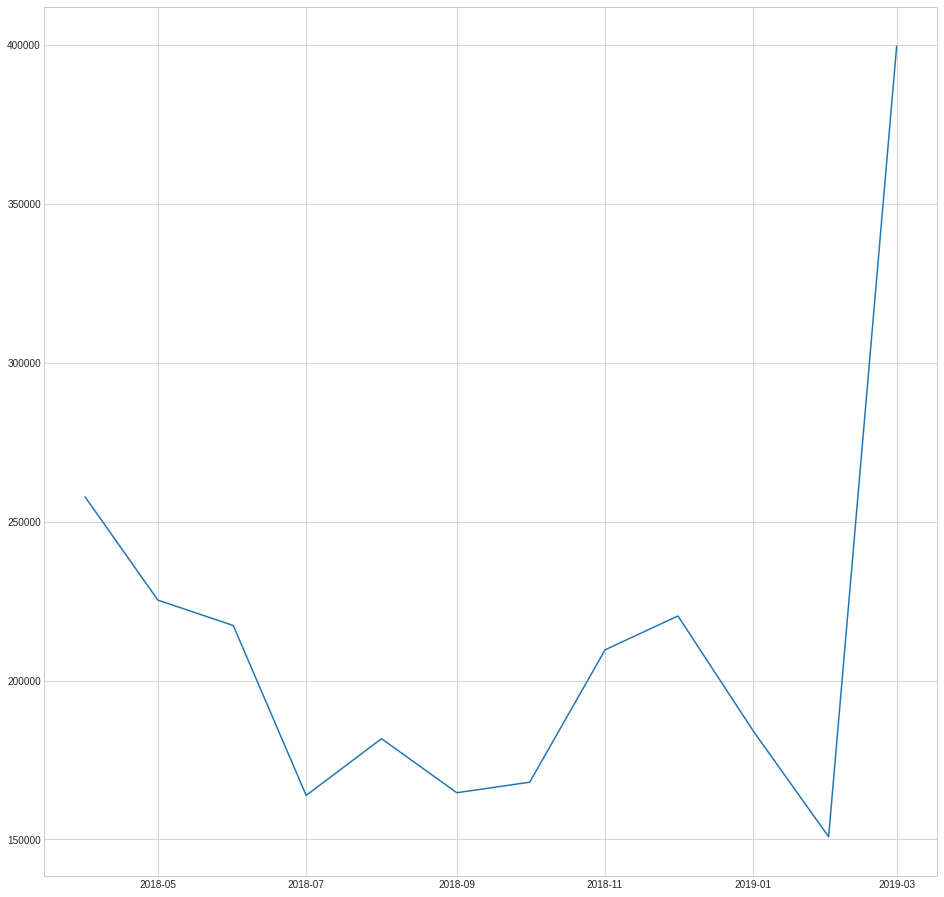

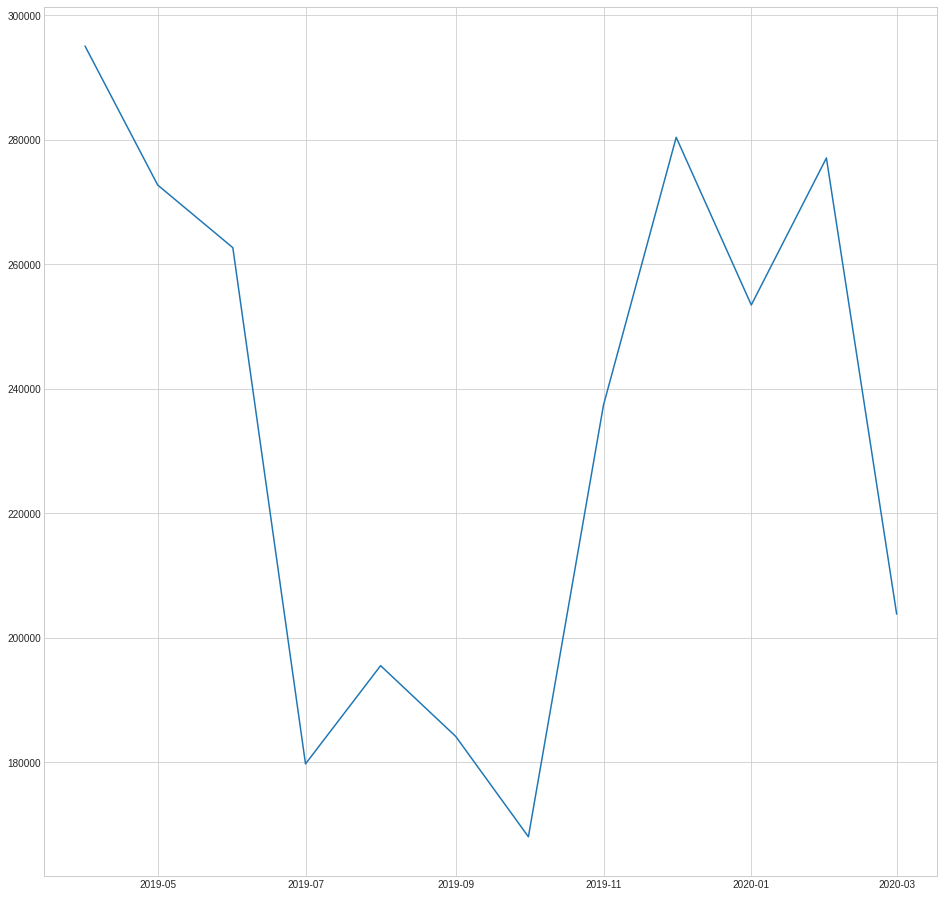

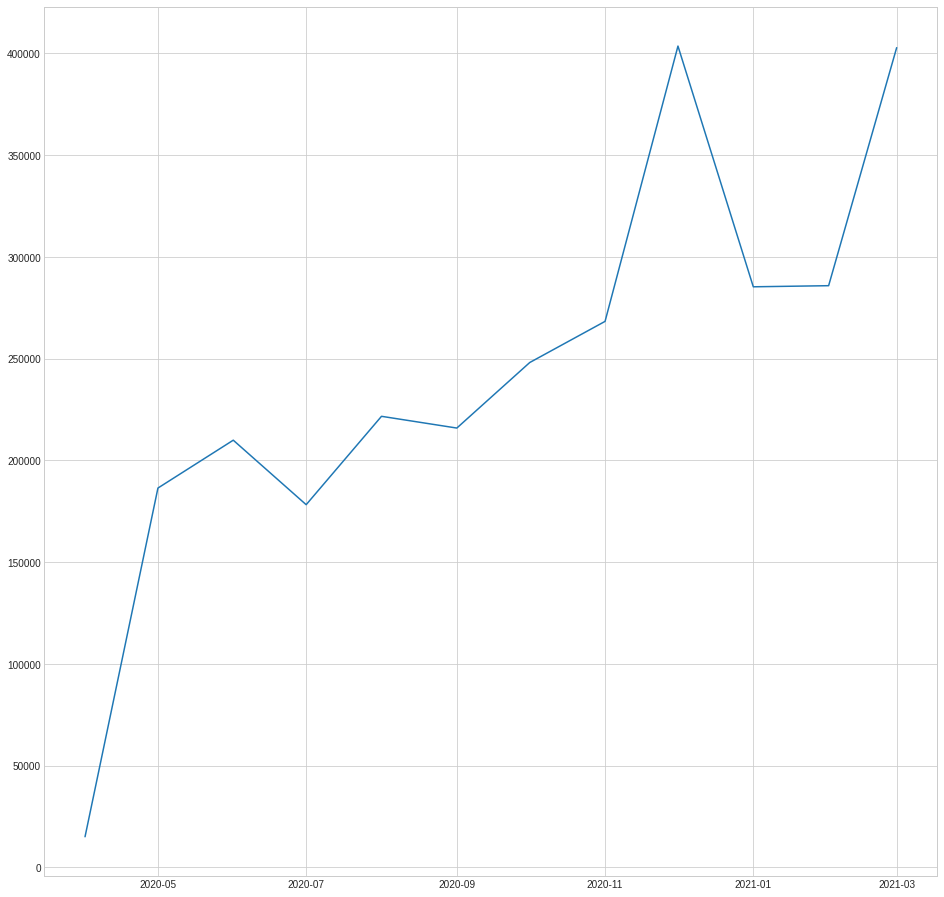

In [23]:
for i in yearwise_months:
    plt.figure(figsize=(16,16))
    plt.plot(item_data[i].sum())
    plt.show()
    # display(data[i])

# PREPROCESSING

In [24]:
df = data.copy()
df['SKU id'] = [int(i[4:]) for i in df['SKU id']]
dummy_Region = pd.get_dummies(df['Region'],prefix='Region_')
df = pd.merge(
            left = dummy_Region,
            right = df,
            left_index=True,
            right_index=True)
df.columns = map(str,df.columns)
pd.display(df)

AttributeError: module 'pandas' has no attribute 'display'

In [ ]:
X = df.drop(['Warehouse id','Region'],axis=1)
X.head(2)

Region__EAST  Region__NORTH  Region__SOUTH  Region__WEST  SKU id  \
0             0              1              0             0       1   
1             0              1              0             0       2   

   2018-04-01 00:00:00  2018-05-01 00:00:00  2018-06-01 00:00:00  \
0                   27                   13                   30   
1                   88                   28                  127   

   2018-07-01 00:00:00  2018-08-01 00:00:00  ...  2020-08-01 00:00:00  \
0                   14                   22  ...                   12   
1                  130                   58  ...                   16   

   2020-09-01 00:00:00  2020-10-01 00:00:00  2020-11-01 00:00:00  \
0                    8                    8                    8   
1                    7                    7                    7   

   2020-12-01 00:00:00  2021-01-01 00:00:00  2021-02-01 00:00:00  \
0                    8                    8                   14   
1                    7                    7                   13   

   2021-03-01 00:00:00  2021-04-01 00:00:00  2021-05-01 00:00:00  
0                   16                    8                   12  
1                   43                   13                   43  

[2 rows x 43 columns]

In [ ]:
df.columns

Index(['Region__EAST', 'Region__NORTH', 'Region__SOUTH', 'Region__WEST',
       'Warehouse id', 'Region', 'SKU id', '2018-04-01 00:00:00',
       '2018-05-01 00:00:00', '2018-06-01 00:00:00', '2018-07-01 00:00:00',
       '2018-08-01 00:00:00', '2018-09-01 00:00:00', '2018-10-01 00:00:00',
       '2018-11-01 00:00:00', '2018-12-01 00:00:00', '2019-01-01 00:00:00',
       '2019-02-01 00:00:00', '2019-03-01 00:00:00', '2019-04-01 00:00:00',
       '2019-05-01 00:00:00', '2019-06-01 00:00:00', '2019-07-01 00:00:00',
       '2019-08-01 00:00:00', '2019-09-01 00:00:00', '2019-10-01 00:00:00',
       '2019-11-01 00:00:00', '2019-12-01 00:00:00', '2020-01-01 00:00:00',
       '2020-02-01 00:00:00', '2020-03-01 00:00:00', '2020-04-01 00:00:00',
       '2020-05-01 00:00:00', '2020-06-01 00:00:00', '2020-07-01 00:00:00',
       '2020-08-01 00:00:00', '2020-09-01 00:00:00', '2020-10-01 00:00:00',
       '2020-11-01 00:00:00', '2020-12-01 00:00:00', '2021-01-01 00:00:00',
       '2021-02-01 00:00:

In [ ]:
data_north = data.loc[data['Region']=='NORTH']
data_east = data.loc[data['Region']=='EAST']
data_west = data.loc[data['Region']=='WEST']
data_south = data.loc[data['Region']=='SOUTH']
data_north.head(1)

Warehouse id Region SKU id  2018-04-01 00:00:00  2018-05-01 00:00:00  \
0         Wh-1  NORTH  SKU-1                   27                   13   

   2018-06-01 00:00:00  2018-07-01 00:00:00  2018-08-01 00:00:00  \
0                   30                   14                   22   

   2018-09-01 00:00:00  2018-10-01 00:00:00  ...  2020-08-01 00:00:00  \
0                    8                    8  ...                   12   

   2020-09-01 00:00:00  2020-10-01 00:00:00  2020-11-01 00:00:00  \
0                    8                    8                    8   

   2020-12-01 00:00:00  2021-01-01 00:00:00  2021-02-01 00:00:00  \
0                    8                    8                   14   

   2021-03-01 00:00:00  2021-04-01 00:00:00  2021-05-01 00:00:00  
0                   16                    8                   12  

[1 rows x 41 columns]

# KMEANS CLUSTERING

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
def elbow_plot(X:pd.DataFrame):
    wcss = []
    n_clusters_max = 40
    for i in range(1, n_clusters_max):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42,)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, n_clusters_max), wcss,'-*')
    plt.title('ELBOW')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    return kmeans


In [ ]:
def calc_normal(N1):
    col = N1.columns.tolist()
    for i in range(len(N1)):
        mean_i = N1.iloc[i,:].mean()
        std_i = N1.iloc[i,:].std()
        for j in range(len(col)):
            N1.iloc[i,j] = (N1.iloc[i,j] - mean_i)/std_i

def calc_minmax(N1):
    col = N1.columns.tolist()
    for i in range(len(N1)):
        max_i = N1.iloc[i,:].max()
        min_i = N1.iloc[i,:].min()
        for j in range(len(col)):
            N1.iloc[i,j] = (N1.iloc[i,j] - min_i)/(max_i-min_i)
            





# north

normalize
min_max 

In [ ]:
X_n = data_north.iloc[:,3:]
# X_n.columns = map(str,X_n.columns)
# wcss = []
# n_clusters_max = 40
# for i in range(1, n_clusters_max):
#     kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42,)
#     kmeans.fit(X_n)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1, n_clusters_max), wcss,'-*')
# plt.title('ELBOW')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()


In [ ]:
kmeans = KMeans(n_clusters=4,max_iter=100,random_state=42)
result = kmeans.fit_predict(X_n)

/home/piranha/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
result

array([0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3,
       3, 3, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

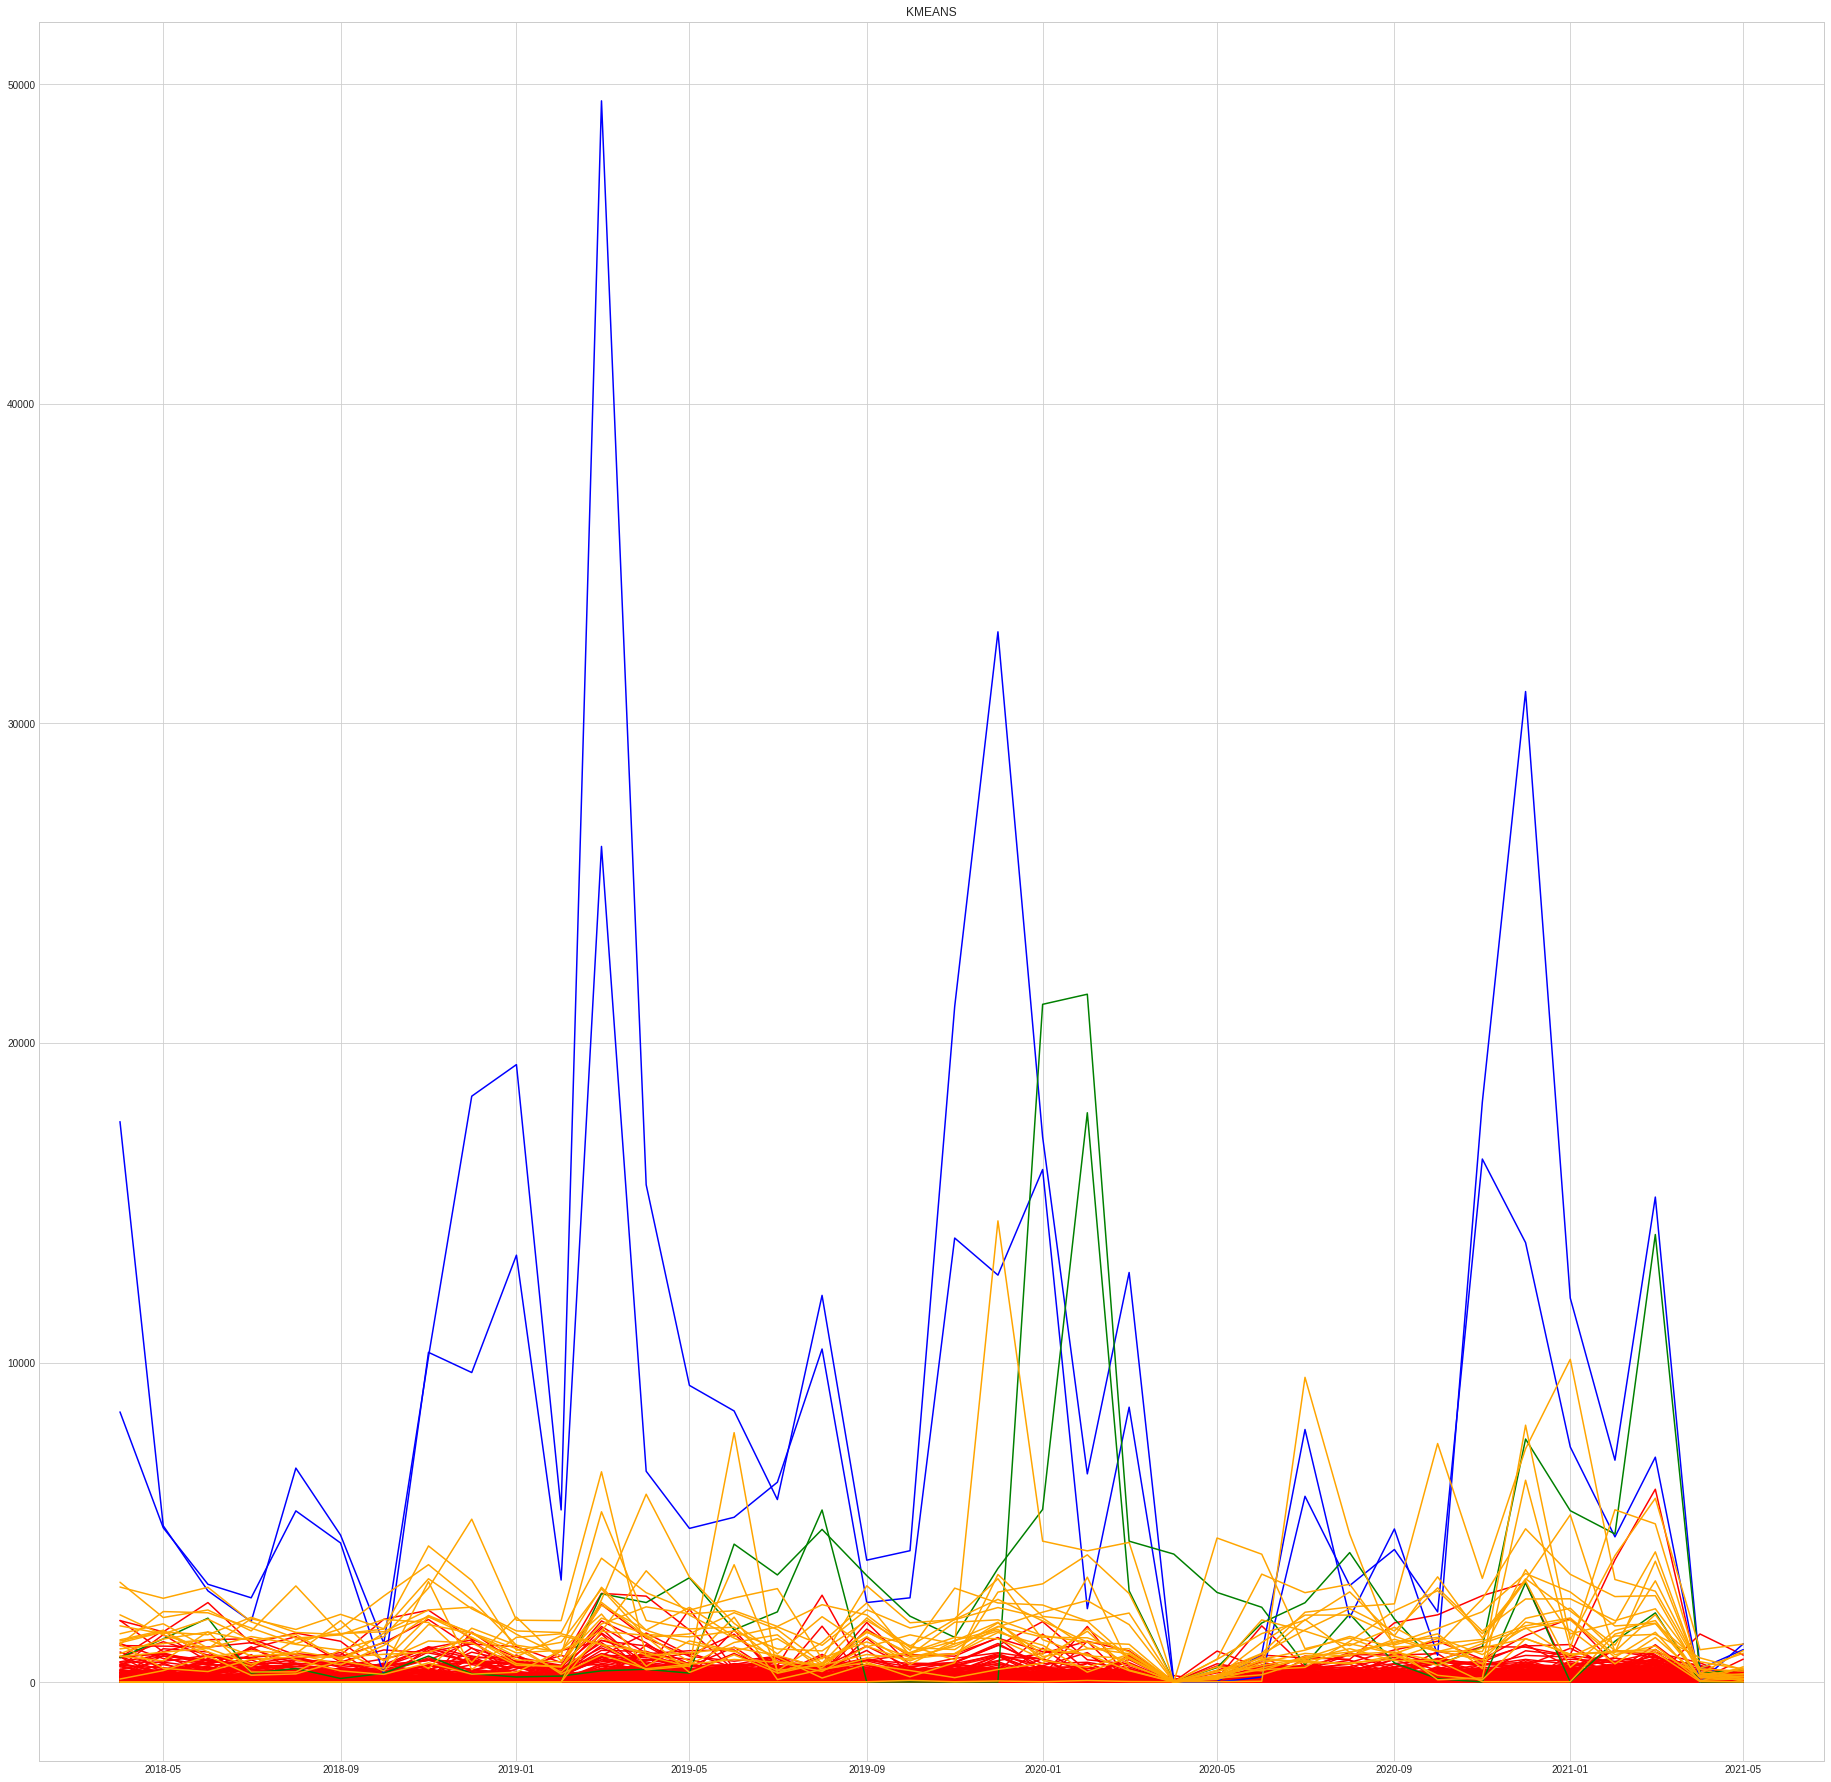

In [ ]:
plt.figure(figsize=(32,32))
color_list={0:"red",1:'blue',2:'green',3:'orange',4:'olive'}
plt.title("KMEANS")
for co in range(0,4):
    cluster_d = X_n[result==co]
    for i in range(len(cluster_d)):
        plt.plot(cluster_d.iloc[i],color = color_list[co])
plt.show()

In [ ]:
X_n_normalized = X_n.copy()
X_n_minmax  = X_n.copy()
calc_normal(X_n_normalized)
calc_minmax(X_n_minmax)

/tmp/ipykernel_11508/1937690897.py:7: RuntimeWarning: invalid value encountered in double_scalars
  N1.iloc[i,j] = (N1.iloc[i,j] - mean_i)/std_i
/tmp/ipykernel_11508/1937690897.py:15: RuntimeWarning: invalid value encountered in double_scalars
  N1.iloc[i,j] = (N1.iloc[i,j] - min_i)/(max_i-min_i)


In [ ]:
X_n_minmax.shape

(233, 38)

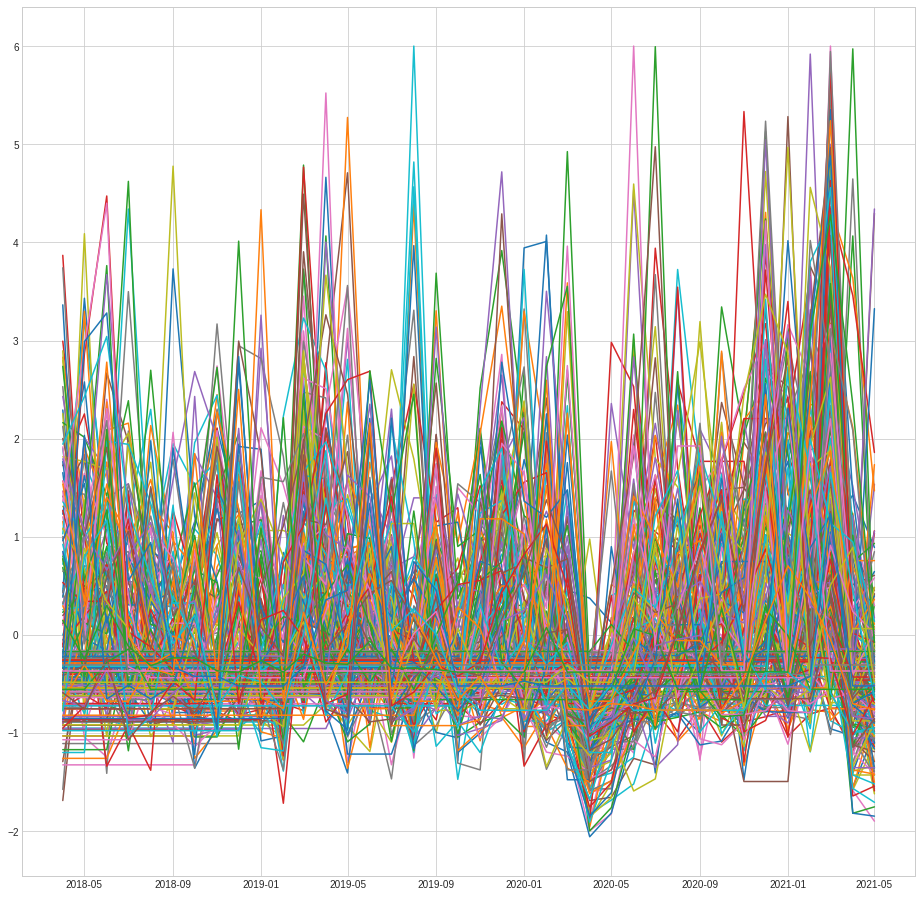

In [ ]:
plot_d(X_n_normalized)

In [ ]:
pd.Series(kmeans.labels_).value_counts()

0    211
3     18
1      2
2      2
dtype: int64

/home/piranha/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime']. An error will be raised in 1.2.
  warnings.warn(
/home/piranha/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime']. An error will be raised in 1.2.
  warnings.warn(
/home/piranha/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime']. An error will be raised in 1.2.
  warnings.warn(
/home/piranha/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime']. An error will be raised in 1.2.
  warnings.warn(
/home/piranh

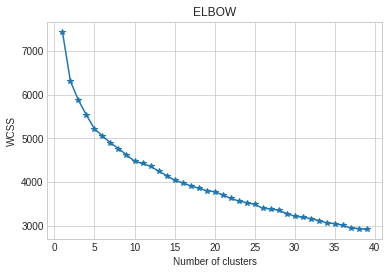

KMeans(n_clusters=39, random_state=42)

In [ ]:

X_n_normalized.dropna(inplace = True)
elbow_plot(X_n_normalized)

In [ ]:
kmeans = KMeans(n_clusters=8,random_state=42)
result = kmeans.fit_predict(X_n_normalized)


/home/piranha/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime']. An error will be raised in 1.2.
  warnings.warn(


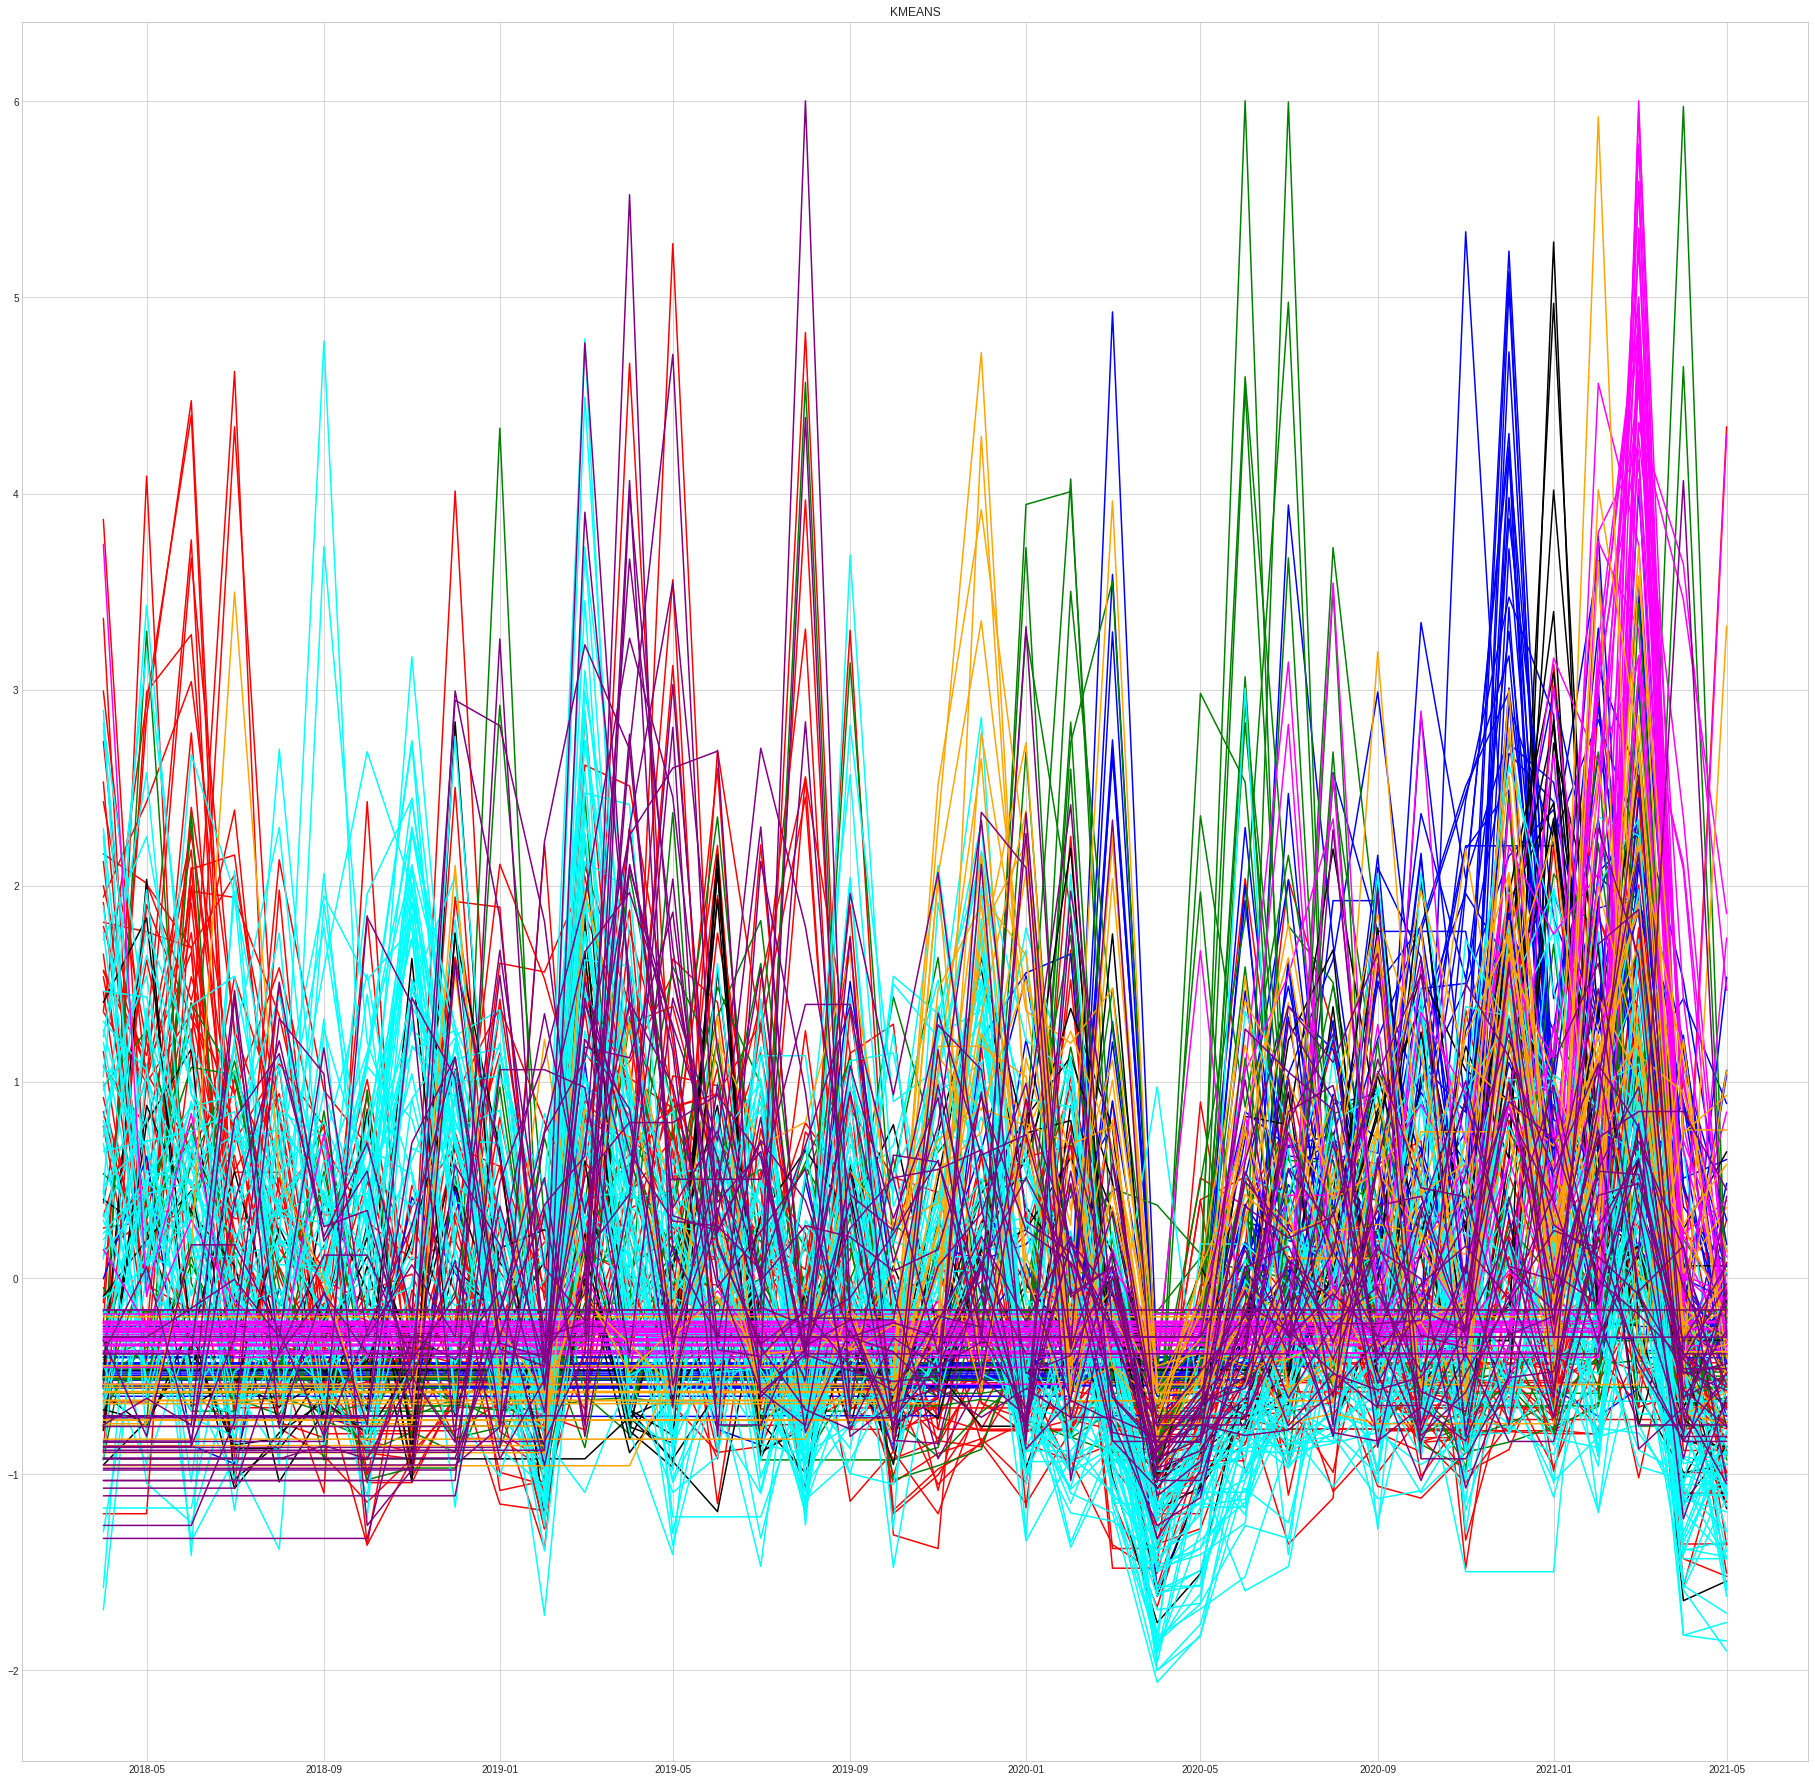

In [ ]:
plt.figure(figsize=(32,32))
color_list=['red','blue','green','black','cyan','magenta','orange','purple','olive','yellow','gray']
plt.title("KMEANS")
for co in range(0,8):
    cluster_d = X_n_normalized[result==co]
    for i in range(len(cluster_d)):
        plt.plot(cluster_d.iloc[i],color = color_list[co])
plt.show()


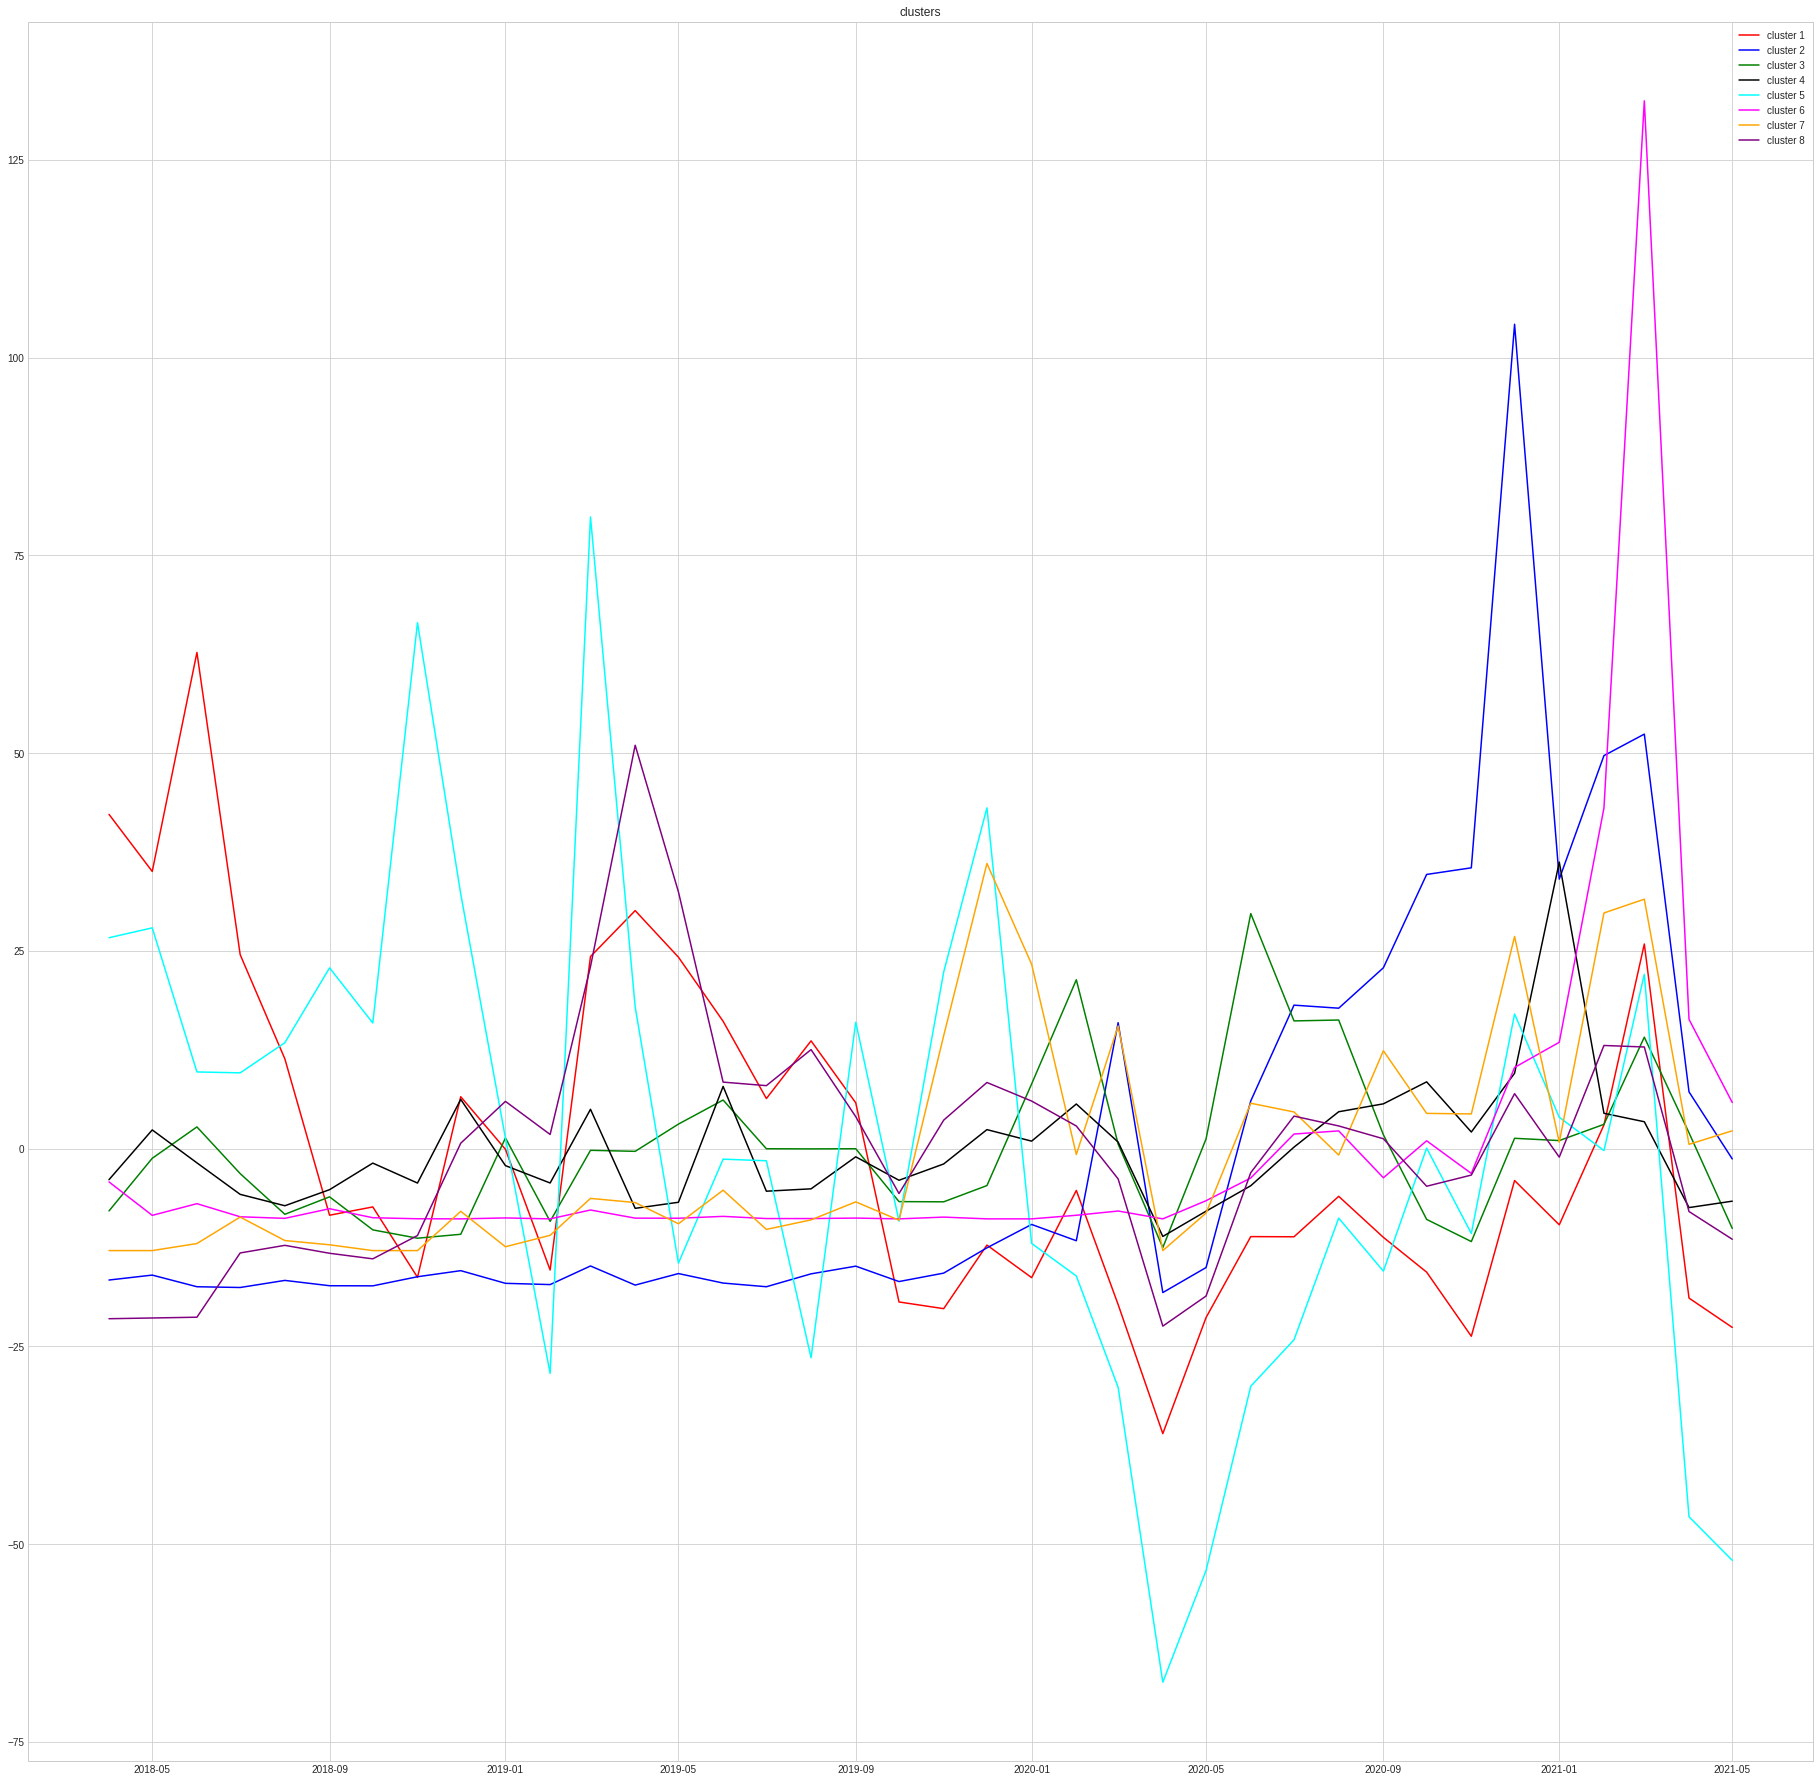

In [ ]:
plt.figure(figsize=(32,32))
plt.title("clusters")
for co in range(0,8):
    cluster_d = X_n_normalized[result==co].sum()
    plt.plot(cluster_d,color = color_list[co])
plt.legend(['cluster {}'.format(i) for i in range(1,9)])
plt.show()


In [ ]:
pd.Series(kmeans.labels_).value_counts()

4    48
0    38
1    35
5    29
7    27
2    23
6    20
3    11
dtype: int64

## SOUTH

In [ ]:
# X_s = data_south.iloc[:,3:]
# X_s.columns = map(str,X_s.columns)
# # wcss = []
# # n_clusters_max = 40
# # for i in range(1, n_clusters_max):
# #     kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42,)
# #     kmeans.fit(X_s)
# #     wcss.append(kmeans.inertia_)
# # plt.plot(range(1, n_clusters_max), wcss)
# # plt.title('ELBOW')
# # plt.xlabel('Number of clusters')
# # plt.ylabel('WCSS')
# # plt.show()


In [ ]:
# kmeans = KMeans(n_clusters=6,random_state=42)
# result = kmeans.fit_predict(X_s)

In [ ]:
# result

In [ ]:
# plt.figure(figsize=(32,32))
# color_list={0:"red",1:'blue',2:'green',3:'orange',4:'olive',5:'maroon'}
# plt.title("KMEANS")
# for co in range(0,7):
#     cluster_d = X_s[result==co]
#     for i in range(len(cluster_d)):
#         plt.plot(cluster_d.iloc[i],color = color_list[co])
# plt.show()

# EAST

In [ ]:
# X_e = data_east.iloc[:,3:]
# X_e.columns = map(str,X_e.columns)
# # wcss = []
# # n_clusters_max = 40
# # for i in range(1, n_clusters_max):
# #     kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42,)
# #     kmeans.fit(X_e)
# #     wcss.append(kmeans.inertia_)
# # plt.plot(range(1, n_clusters_max), wcss)
# # plt.title('ELBOW')
# # plt.xlabel('Number of clusters')
# # plt.ylabel('WCSS')
# # plt.show()


In [ ]:
# kmeans = KMeans(n_clusters=5,random_state=42)
# result = kmeans.fit_predict(X_e)
# result

In [ ]:
# plt.figure(figsize=(32,32))
# plt.title("KMEANS")
# for co in range(0,5):
#     cluster_d = X_e[result==co]
#     for i in range(len(cluster_d)):
#         plt.plot(cluster_d.iloc[i],color = color_list[co])
# plt.show()

# WEST


In [ ]:
# X_w = data_west.iloc[:,3:]
# X_w.columns = map(str,X_w.columns)
# # wcss = []
# # n_clusters_max = 40
# # for i in range(1, n_clusters_max):
# #     kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42,)
# #     kmeans.fit(X_w)
# #     wcss.append(kmeans.inertia_)
# # plt.plot(range(1, n_clusters_max), wcss)
# # plt.title('ELBOW')
# # plt.xlabel('Number of clusters')
# # plt.ylabel('WCSS')
# # plt.show()


In [ ]:
# kmeans = KMeans(n_clusters=4,random_state=42)
# result = kmeans.fit_predict(X_w)
# result

In [ ]:
# plt.figure(figsize=(32,32))
# plt.title("KMEANS")
# for co in range(0,5):
#     cluster_d = X_w[result==co]
#     for i in range(len(cluster_d)):
#         plt.plot(cluster_d.iloc[i],color = color_list[co])
# plt.show()

In [ ]:
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


/home/piranha/.local/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/home/piranha/.local/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/home/piranha/.local/lib/python3.8

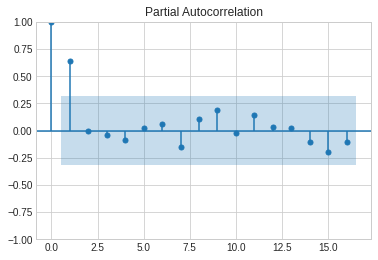

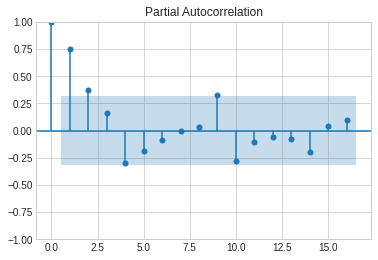

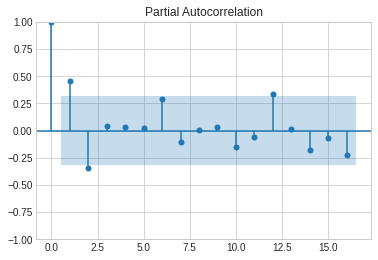

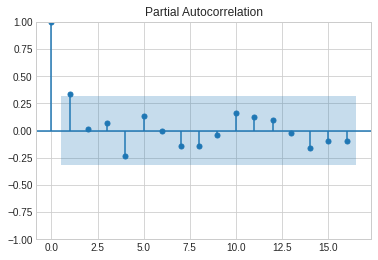

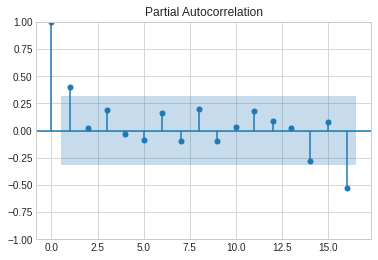

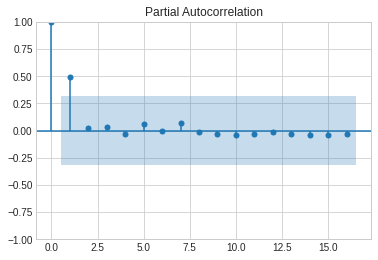

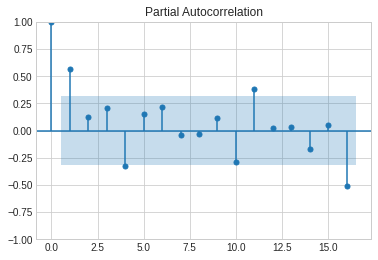

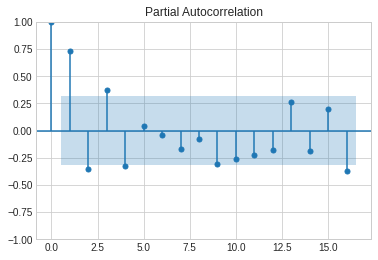

In [ ]:
for i in range(8):
    plot_pacf(X_n_normalized[result==i].sum())


In [ ]:

gm = arch_model(y = X_n_normalized[result==i].mean(), vol='GARCH' , p=3, q=3)
gm_fit = gm.fit(disp='off')
# print(i)
print(gm_fit.summary())
predictions = gm_fit.forecast(horizon = 1)
y_pred = predictions.mean['h.1'].iloc[-1]
print("{}     {}    {}".format(i,y_pred,X_n_normalized[result==0].iloc[:,-1].sum()))


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -25.3280
Distribution:                  Normal   AIC:                           66.6561
Method:            Maximum Likelihood   BIC:                           79.7568
                                        No. Observations:                   38
Date:                Fri, Mar 04 2022   Df Residuals:                       37
Time:                        21:17:46   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu            -0.1854  5.533e-02     -3.352  8.032e-04 [ -0.2

/home/piranha/.local/lib/python3.8/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
/home/piranha/.local/lib/python3.8/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -17.6989
Distribution:                  Normal   AIC:                           51.3978
Method:            Maximum Likelihood   BIC:                           64.4985
                                        No. Observations:                   38
Date:                Fri, Mar 04 2022   Df Residuals:                       37
Time:                        21:17:46   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0153  5.559e-02      0.275      0.783 [-9.36

/home/piranha/.local/lib/python3.8/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
/home/piranha/.local/lib/python3.8/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
/home/piranha/.local/lib/python3.8/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to 


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                36.2823
Distribution:                  Normal   AIC:                          -56.5646
Method:            Maximum Likelihood   BIC:                          -43.4639
                                        No. Observations:                   38
Date:                Fri, Mar 04 2022   Df Residuals:                       37
Time:                        21:17:47   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.2928  4.590e-03    -63.796      0.000 [ -0.302, -0.2

/home/piranha/.local/lib/python3.8/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
/home/piranha/.local/lib/python3.8/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
/home/piranha/.local/lib/python3.8/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to 

In [ ]:
item_data.iloc[1,:]

2018-04-01    405
2018-05-01    223
2018-06-01    179
2018-07-01    237
2018-08-01    168
2018-09-01     84
2018-10-01    212
2018-11-01     90
2018-12-01    320
2019-01-01    118
2019-02-01     58
2019-03-01    271
2019-04-01    341
2019-05-01    373
2019-06-01    384
2019-07-01    221
2019-08-01    128
2019-09-01    317
2019-10-01    362
2019-11-01    211
2019-12-01    132
2020-01-01     76
2020-02-01    228
2020-03-01    177
2020-04-01     36
2020-05-01    669
2020-06-01    208
2020-07-01    178
2020-08-01    122
2020-09-01    407
2020-10-01    237
2020-11-01    196
2020-12-01    132
2021-01-01     76
2021-02-01    188
2021-03-01    302
2021-04-01    161
2021-05-01    256
Name: SKU-2, dtype: object

In [ ]:

item_data.iloc[1,:].tolist()
gm = arch_model(y = item_data.iloc[0], vol='GARCH' , p=1, q=1)
gm_fit = gm.fit(disp='off')
print(gm_fit.summary())
predictions = gm_fit.forecast(horizon = 1)
para = gm_fit.params

NameError: name 'item_data' is not defined

In [ ]:
a_t = para.mu* np.sqrt(para.omega + para.alpha[1]*item_data.iloc[1,-1])

214.28682157501032